# Plot parameter space visualizations

This notebook aims to duplicate (and add more options to) the multi-echo paramater space visualizations from here: https://github.com/ME-ICA/tedana/issues/552

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display, set_matplotlib_formats

In [14]:
# Read in 3x3x3 data (first tab/sheet of the original document)
data_fn = 'MultiEchoParameterSpace_PrismaVD11_2020_3x3x3.csv'
df = pd.read_csv(data_fn)
# Print column names
print(df.columns.to_list())

['Voxel size', 'Grid', 'FOV', 'Inslice Accel', 'Multislice Accel', 'Partial Fourier', 'Slices', 'Number of Echos', 'TR', 'E1', 'E2', 'E3', 'E4', 'E5', 'E6', 'E7', 'E8', 'Scanned (vs just saved)']


<Figure size 432x288 with 0 Axes>

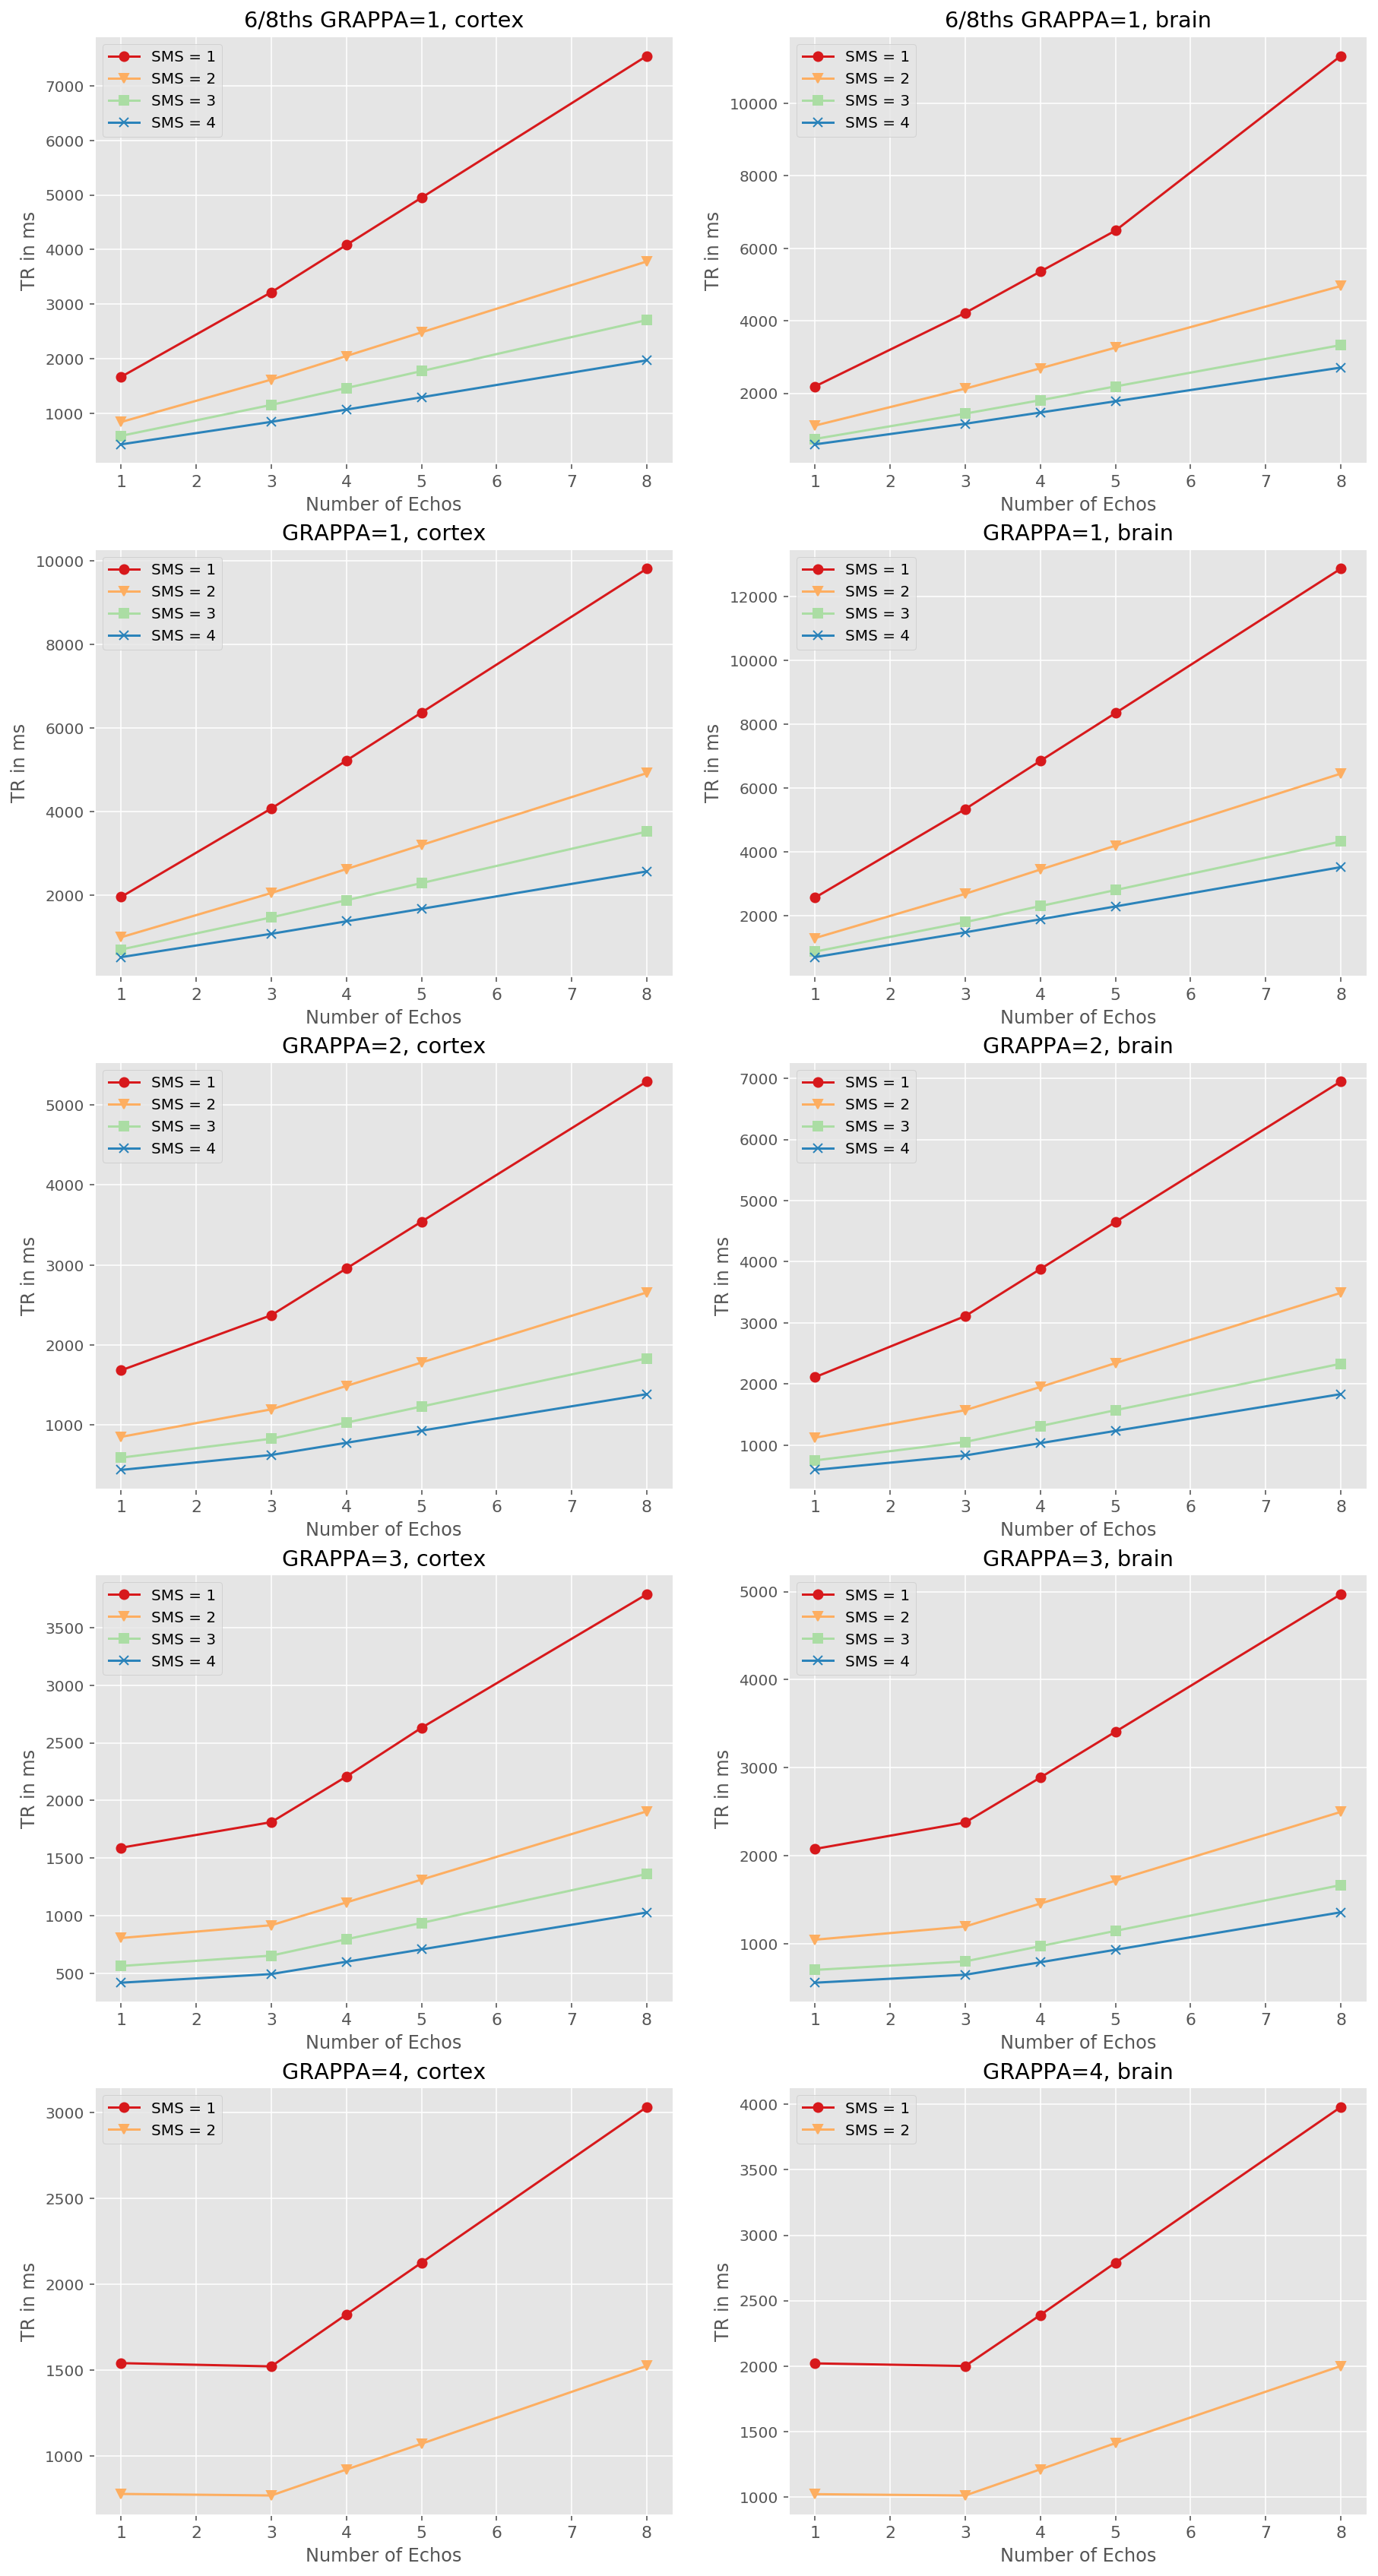

In [24]:
# Plot styling
plt.style.use('ggplot')
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Helvetica'
set_matplotlib_formats('retina', quality=100)
plt.subplots_adjust(left=0.125, right=0.9, bottom=0.1, top=0.9, wspace=0.2, hspace=2)
plt.rc('xtick', labelsize=11) 
plt.rc('ytick', labelsize=10)  #condition_if_true if condition else condition_if_false
line_colors = ['#d7191c', '#fdae61', '#abdda4', '#2b83ba']
line_markers = ['o', 'v', 's', 'x']
fig, ax = plt.subplots(nrows=5, ncols=2, figsize=(15, 30))
ax = ax.flatten()

# filtering and axes parameters
slice_thresh = 35
inslice_accel = np.unique(df["Inslice Accel"].to_numpy())
i = 0

# First plot Partial Fourier = 6/8ths, GRAPPA = 1
partial_fourier = '6/8ths'
grappa = 1
df_cortex = df[(df["Inslice Accel"] == grappa) & (df["Slices"] < slice_thresh) & (df["Partial Fourier"] == partial_fourier)]
df_brain = df[(df["Inslice Accel"] == grappa) & (df["Slices"] > slice_thresh) & (df["Partial Fourier"] == partial_fourier)]
multislice_accel = np.unique(df_cortex["Multislice Accel"].to_numpy())
for c, sms in enumerate(multislice_accel):
    # Cortex
    df_plotC = df_cortex[df_cortex["Multislice Accel"]==sms]
    xC = df_plotC["Number of Echos"].to_numpy()
    yC = df_plotC["TR"].to_numpy()
    lineC, = ax[i].plot(xC, yC, marker=line_markers[c], color=line_colors[c], label=f"SMS = {sms}")
    # Brain
    df_plotB = df_brain[df_brain["Multislice Accel"]==sms]
    xB = df_plotB["Number of Echos"].to_numpy()
    yB = df_plotB["TR"].to_numpy()
    lineB, = ax[i+1].plot(xB, yB, marker=line_markers[c], color=line_colors[c], label=f"SMS = {sms}")
ax[i].set(title=f"6/8ths GRAPPA={grappa}, cortex", xlabel="Number of Echos", ylabel="TR in ms")
ax[i].legend()
ax[i+1].set(title=f"6/8ths GRAPPA={grappa}, brain", xlabel="Number of Echos", ylabel="TR in ms")
ax[i+1].legend()
i+=2


# Then plot GRAPPA = 1,2,3,4
partial_fourier = 'off'
for grappa in inslice_accel:
    df_cortex = df[(df["Inslice Accel"] == grappa) & (df["Slices"] < slice_thresh) & (df["Partial Fourier"] == partial_fourier)]
    df_brain = df[(df["Inslice Accel"] == grappa) & (df["Slices"] > slice_thresh) & (df["Partial Fourier"] == partial_fourier)]
    multislice_accel = np.unique(df_cortex["Multislice Accel"].to_numpy())
    for c, sms in enumerate(multislice_accel):
        # Cortex
        df_plotC = df_cortex[df_cortex["Multislice Accel"]==sms]
        xC = df_plotC["Number of Echos"].to_numpy()
        yC = df_plotC["TR"].to_numpy()
        lineC, = ax[i].plot(xC, yC, marker=line_markers[c], color=line_colors[c], label=f"SMS = {sms}")
        # Brain
        df_plotB = df_brain[df_brain["Multislice Accel"]==sms]
        xB = df_plotB["Number of Echos"].to_numpy()
        yB = df_plotB["TR"].to_numpy()
        lineB, = ax[i+1].plot(xB, yB, marker=line_markers[c], color=line_colors[c], label=f"SMS = {sms}")
        
    ax[i].set(title=f"GRAPPA={grappa}, cortex", xlabel="Number of Echos", ylabel="TR in ms")
    ax[i].legend()
    ax[i+1].set(title=f"GRAPPA={grappa}, brain", xlabel="Number of Echos", ylabel="TR in ms")
    ax[i+1].legend()
    i+=2

In [25]:
fig.savefig('me_parameter_space_3x3x3.png', dpi=300, format='png', bbox_inches='tight')